# 1. Download the dataset: Dataset

# 2. Load the dataset.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv(r"C:\Users\sowmy\Downloads\archive\Churn_Modelling.csv")
df=pd.DataFrame(df)
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [81]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [82]:
df.head(10).style.background_gradient(cmap="rainbow")


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0
5,645,Spain,Male,44,8,113755.780000,2,1,0,149756.710000,1
6,822,France,Male,50,7,0.000000,2,1,1,10062.800000,0
7,376,Germany,Female,29,4,115046.740000,4,1,0,119346.880000,1
8,501,France,Male,44,4,142051.070000,2,0,1,74940.500000,0
9,684,France,Male,27,2,134603.880000,1,1,1,71725.730000,0


In [70]:
df.tail(10).style.background_gradient(cmap="gnuplot2_r")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,714,Germany,Male,33,3,35016.600000,1,1,0,53667.080000,0
9991,597,France,Female,53,4,88381.210000,1,1,0,69384.710000,1
9992,726,Spain,Male,36,2,0.000000,1,1,0,195192.400000,0
9993,644,France,Male,28,7,155060.410000,1,1,0,29179.520000,0
9994,800,France,Female,29,2,0.000000,2,0,0,167773.550000,0
9995,771,France,Male,39,5,0.000000,2,1,0,96270.640000,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.770000,0
9997,709,France,Female,36,7,0.000000,1,0,1,42085.580000,1
9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.520000,1
9999,792,France,Female,28,4,130142.790000,1,1,0,38190.780000,0


In [71]:
df.shape

(10000, 11)

In [121]:
df.duplicated().sum()

0

In [122]:
corr=df.corr()


<AxesSubplot:>

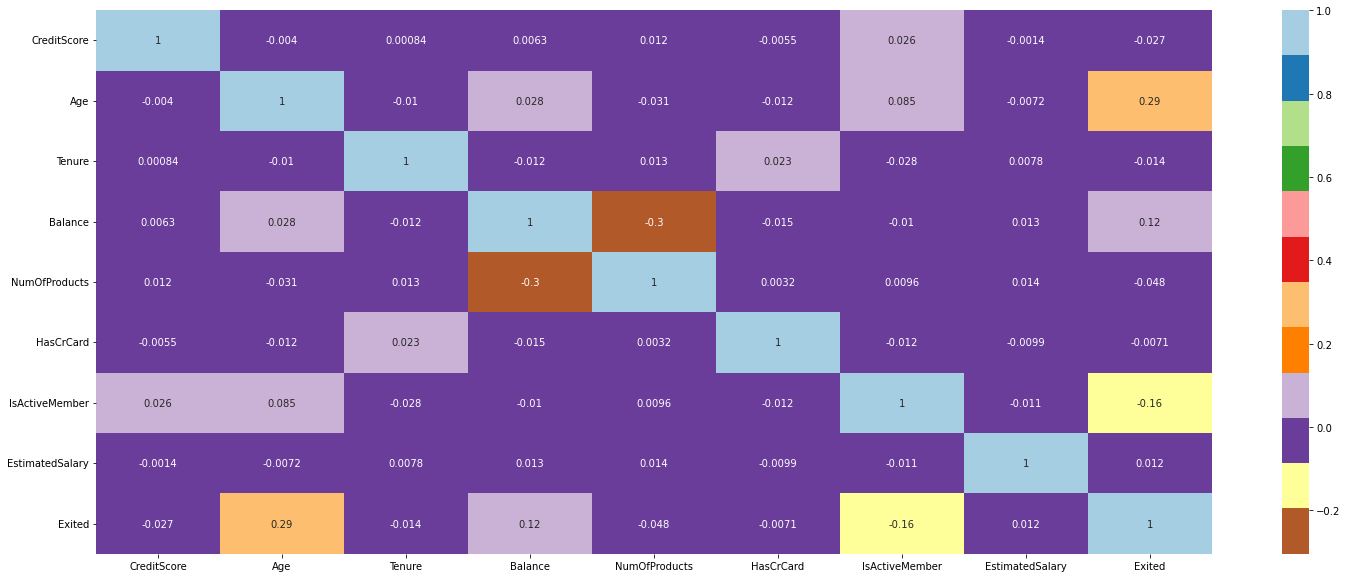

In [123]:
plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cmap='Paired_r')

# 3. Perform Below Visualizations.
# ● Univariate Analysis
# ● Bi - Variate Analysis
# ● Multi - Variate Analysis

<AxesSubplot:xlabel='Geography', ylabel='count'>

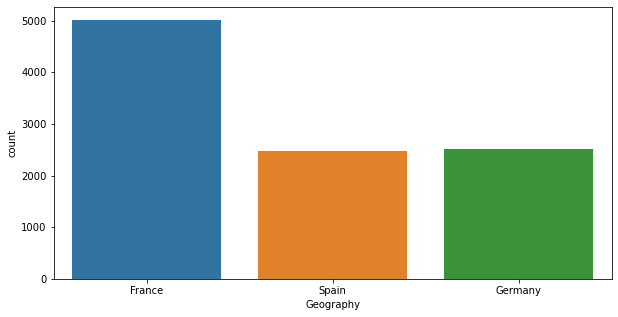

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Geography')

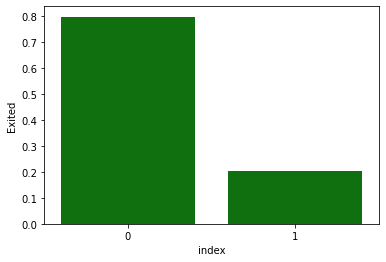

In [128]:

density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited',color="green");


In [75]:
density

,index,Exited
0,0,0.7963
1,1,0.2037


### The data is  imbalanced

In [76]:
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])


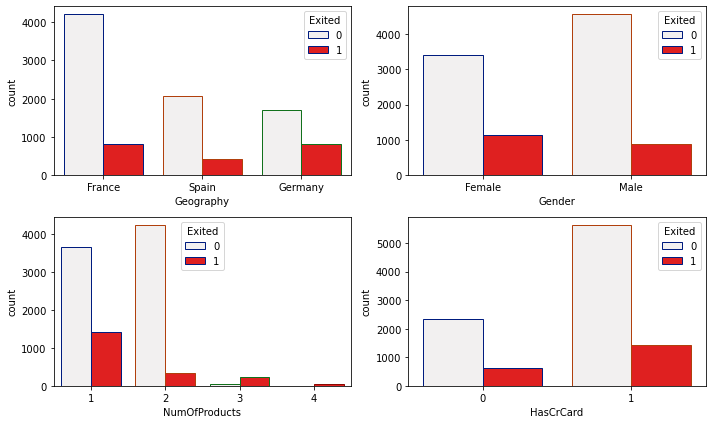

In [77]:
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        df=sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax,color="red",edgecolor=sns.color_palette("dark", 5));
        plt.tight_layout()

# 4. Perform descriptive statistics on the dataset.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [84]:
df.describe().style.background_gradient(cmap='RdYlGn_r')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# 5. Handle the Missing values.

In [85]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Series([], dtype: float64)

In [89]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# VISUALIZING NULL VALUES

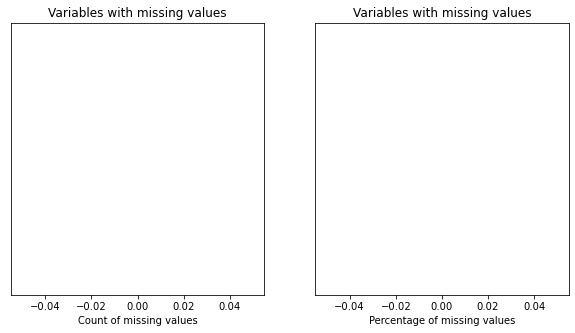

In [91]:
labels = []
valuecount = []
percentcount = []
for col in missing_values:
    labels.append(col)
    valuecount.append(file[col].isnull().sum())
    percentcount.append(file[col].isnull().sum()/file.shape[0]) 
ind = np.arange(len(labels))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
rects = ax1.barh(ind, np.array(valuecount), color='yellow')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");
rects = ax2.barh(ind, np.array(percentcount), color='green')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

# Hence there is no missing values found in data

# CHECKING UNIQUE VALUES

In [106]:
for i in df:
    if df[i].dtype=='object' :
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))

unique of Geography is 3 they are {'Germany', 'France', 'Spain'}
unique of Gender is 2 they are {'Male', 'Female'}


# 6. Find the outliers and replace the outliers

## Checking for outliers

In [191]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1,palette="dark",color="red")
    sns.scatterplot(data=data, x=x,y=y,ax=ax2,markers="x",color="red")

# of Bivariate Outliers: 19


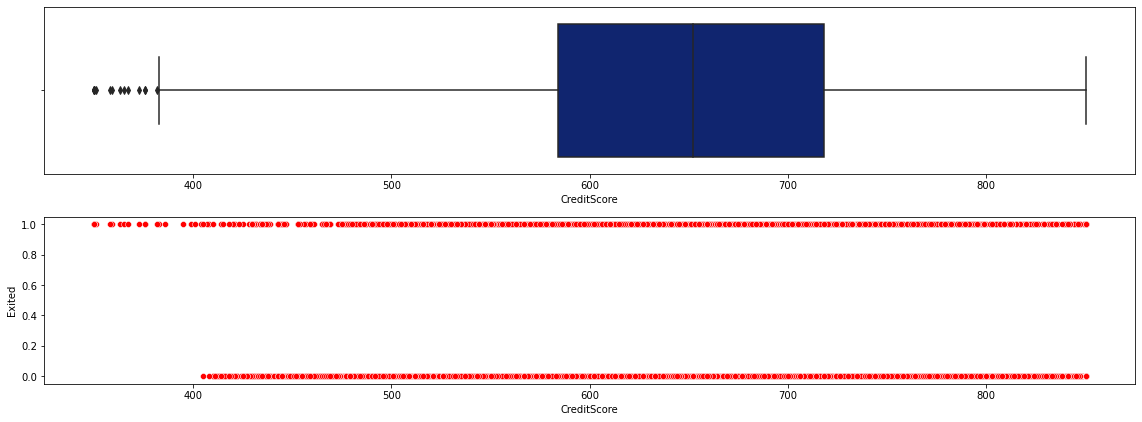

In [192]:
box_scatter(df,'CreditScore','Exited');
sns.scatterplot(data=df, x=df.CreditScore,y=df.Exited,ax=ax2,color="red")
plt.tight_layout(pad=1.20)
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


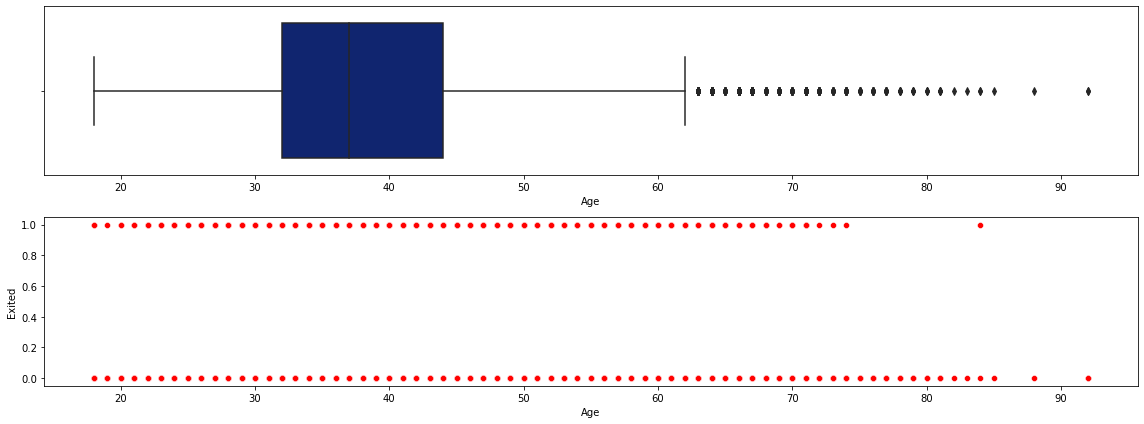

In [193]:
box_scatter(df,'Age','Exited');
sns.lineplot(data=df, x=df.Age,y=df.Exited,ax=ax2,color="red")
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


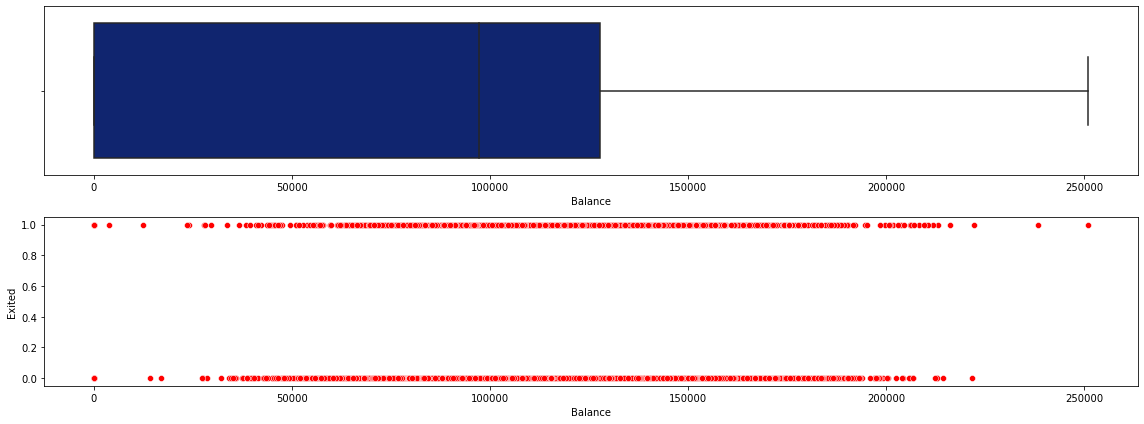

In [194]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

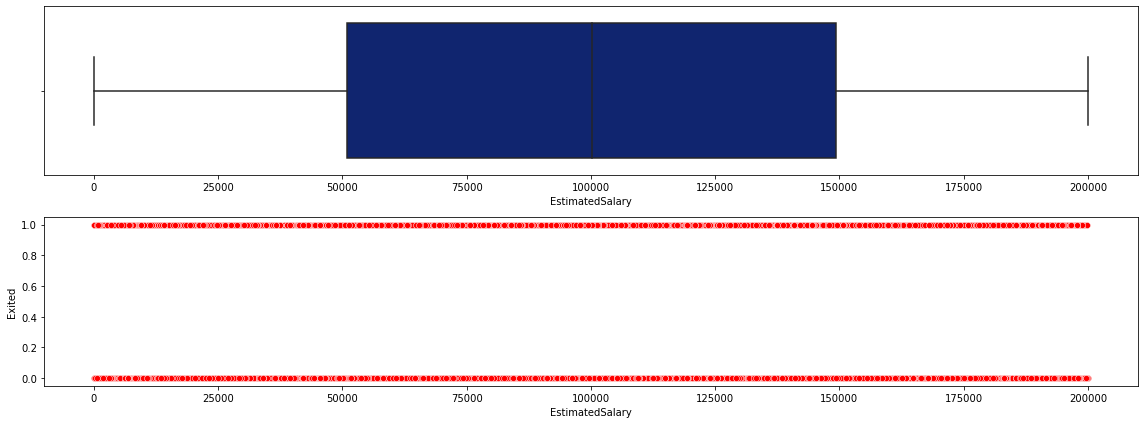

In [195]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

## Removing outliers

In [196]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])
        

## After removing outliers, boxplot will be like

# of Bivariate Outliers: 19


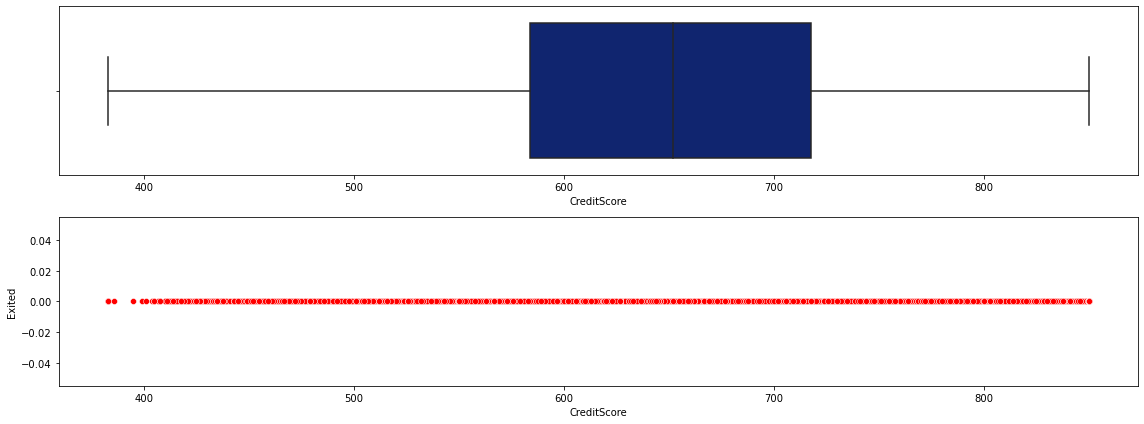

In [197]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


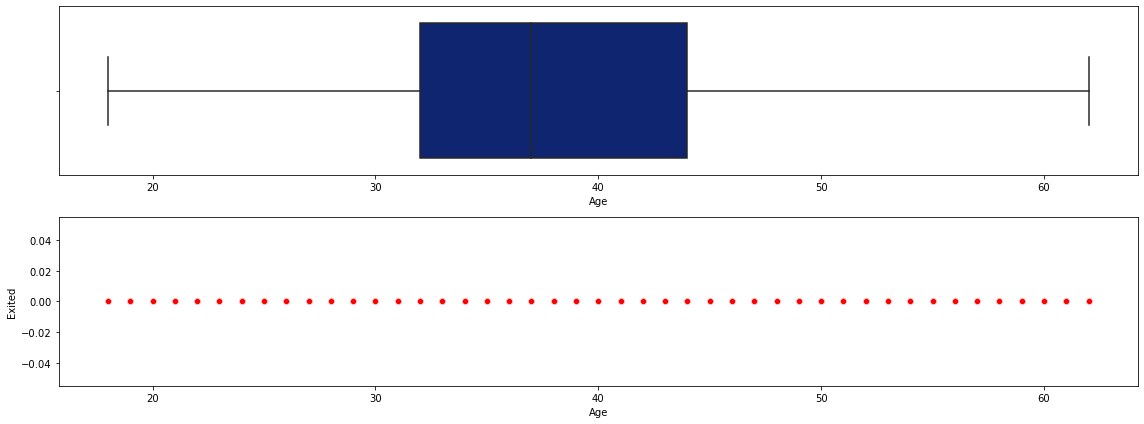

In [198]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


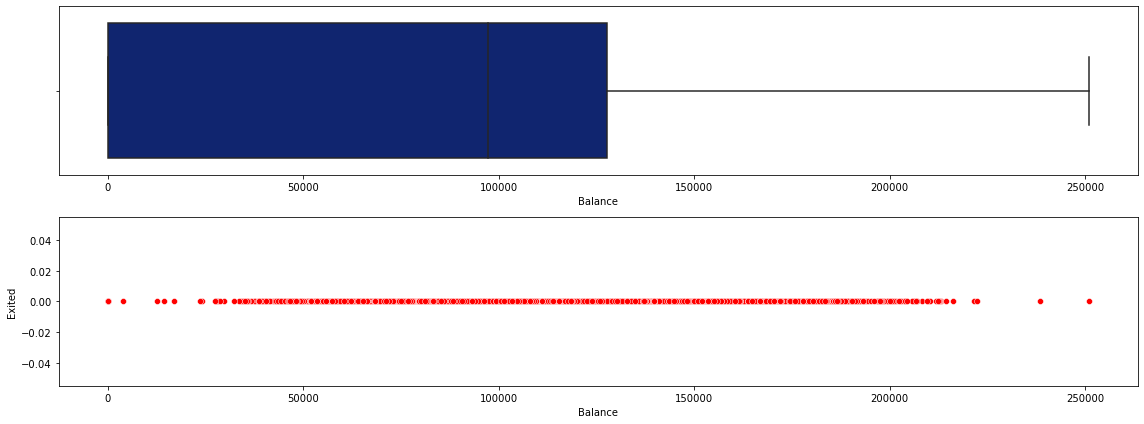

In [199]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

# 7. Check for Categorical columns and perform encoding.

In [202]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' :
        df[i]=encoder.fit_transform(df[i])

# 8. Split the data into dependent and independent variables.

In [203]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [204]:
y=df.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Exited, dtype: float64

# 9. Scale the independent variables

In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# 10. Split the data into training and testing

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [214]:
x_train.shape

(7000, 10)

In [215]:
x_test.shape

(3000, 10)

In [216]:
y_train.shape

(7000,)

In [217]:
y_test.shape

(3000,)